In [6]:
import numpy as np
from matplotlib import pyplot

In [190]:
N = 20000
delt = np.arange(0.1,1.1,0.1)
n=len(delt)
accep = np.zeros(n)
ratio = np.zeros(n)
eqtime = np.zeros(n)
sigma = 1.
sigma2 = sigma**2

def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew

for k in range(n):
    x = np.zeros(N)
    x2 = np.zeros(N)
    delta=delt[k]
    x[0] = 0
    x2[0] = 0
    for i in range(1,N):
        x0 = x[i-1]
        for j in range(10):
            x0 = metropolis(x0)
        x[i] = metropolis(x0)
        x2[i] = x[i]**2
        if (x[i]!=x0):
            accep[k]+=1
        ratio[k]=accep[k]/N
        if (abs(np.mean(x2[:i])-sigma2) < 0.001):
            eqtime[k]=i
            continue

Text(0,0.5,'Equilibrium Time')

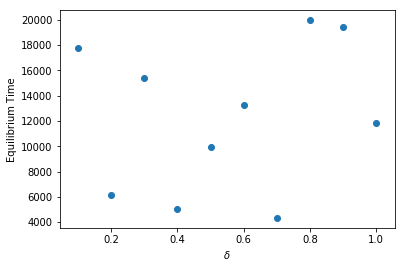

In [191]:
pyplot.scatter(delt,eqtime)
pyplot.xlabel('$\delta$')
pyplot.ylabel('Equilibrium Time')

Text(0,0.5,'Acceptance Rate')

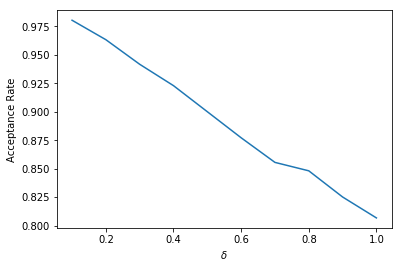

In [192]:
pyplot.plot(delt,ratio)
pyplot.xlabel('$\delta$')
pyplot.ylabel('Acceptance Rate')